In [1]:
%load_ext autoreload
%autoreload 2

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
from stats_tools import auto_stats
import matplotlib.pyplot as plt

## PARAMS

In [65]:
participants = ['PERSA01_1','GHIVA02_2','MONLI03_3']
rooms = ['Baseline','Take-off','Savannah','Canopy','Bats','Underground','Grassland','Sea','End of the world','Baseline_End']
dtypes = ['eeg','ecg','eda','ppg']

In [52]:
ecg_interesting_metrics = ['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_pNN50', 'HRV_pNN20', 'HRV_LF', 'HRV_HF', 'HRV_LFHF', 'HRV_S', 'HRV_CSI', 'HRV_CVI']
ppg_interesting_metrics = ['mean amplitude', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_pNN50', 'HRV_pNN20', 'HRV_LF', 'HRV_HF', 'HRV_LFHF', 'HRV_S', 'HRV_CSI', 'HRV_CVI']
eda_interesting_metrics = ['nb_peaks', 'mean_height', 'EDA_Symp', 'EDA_SympN']

In [66]:
outcomes = {
    'eeg':['Hz_30_80', 'Hz_13_30', 'Hz_8_13', 'Hz_4_8', 'Hz_1_4'],
    'ppg': ppg_interesting_metrics,
    'ecg': ecg_interesting_metrics,
    'eda': eda_interesting_metrics
}

In [54]:
predictor = 'room'
subject = 'participant'

In [103]:
savefig = False

## TOOLS

In [45]:
def load(dtype):
    df = pd.read_excel(f'../metrics/{dtype}_metrics.xlsx').drop(columns = 'Unnamed: 0')
    if dtype == 'eeg': # mean both sides
        df = df.set_index(['participant','room'])
        df_right = df[df['chan'] == 'EEGR']
        df_left = df[df['chan'] == 'EEGL']
        data_right = df_right.drop(columns='chan').values
        data_left = df_left.drop(columns='chan').values
        
        mean_electrodes = (data_right + data_left) / 2
        
        df = pd.DataFrame(data=mean_electrodes, columns = ['Hz_30_80','Hz_13_30','Hz_8_13','Hz_4_8','Hz_1_4'], index=df_right.index).reset_index()
        # df['room'] = df_right['room']
        # df['participant'] = df_right['participant']
        
    return df

## GO

In [96]:
df = load('eda')

In [97]:
df.groupby(predictor).mean()

,nb_peaks,mean_height,EDA_Symp,EDA_SympN
room,,,,
Baseline,29.333333,3.448356,4.332820,0.006391
Baseline_End,12.666667,9.553588,26.567415,0.008748
Bats,37.000000,6.591676,31.589744,0.010491
Canopy,15.666667,8.224930,36.759556,0.020119
End of the world,13.666667,5.027287,7.853104,0.006036
Grassland,42.333333,4.951028,9.266501,0.014130
Savannah,56.000000,5.969853,20.291004,0.009564
Sea,14.333333,5.665773,9.573476,0.016614
Take-off,20.666667,5.035283,6.029317,0.006500


In [70]:
df.groupby(subject).mean()

,Hz_30_80,Hz_13_30,Hz_8_13,Hz_4_8,Hz_1_4
participant,,,,,
GHIVA02_2,0.058773,0.045296,0.018873,0.076822,0.502524
MONLI03_3,0.139750,0.867270,0.184102,0.078338,0.291377
PERSA01_1,0.404644,0.453627,0.048056,0.089698,0.447645


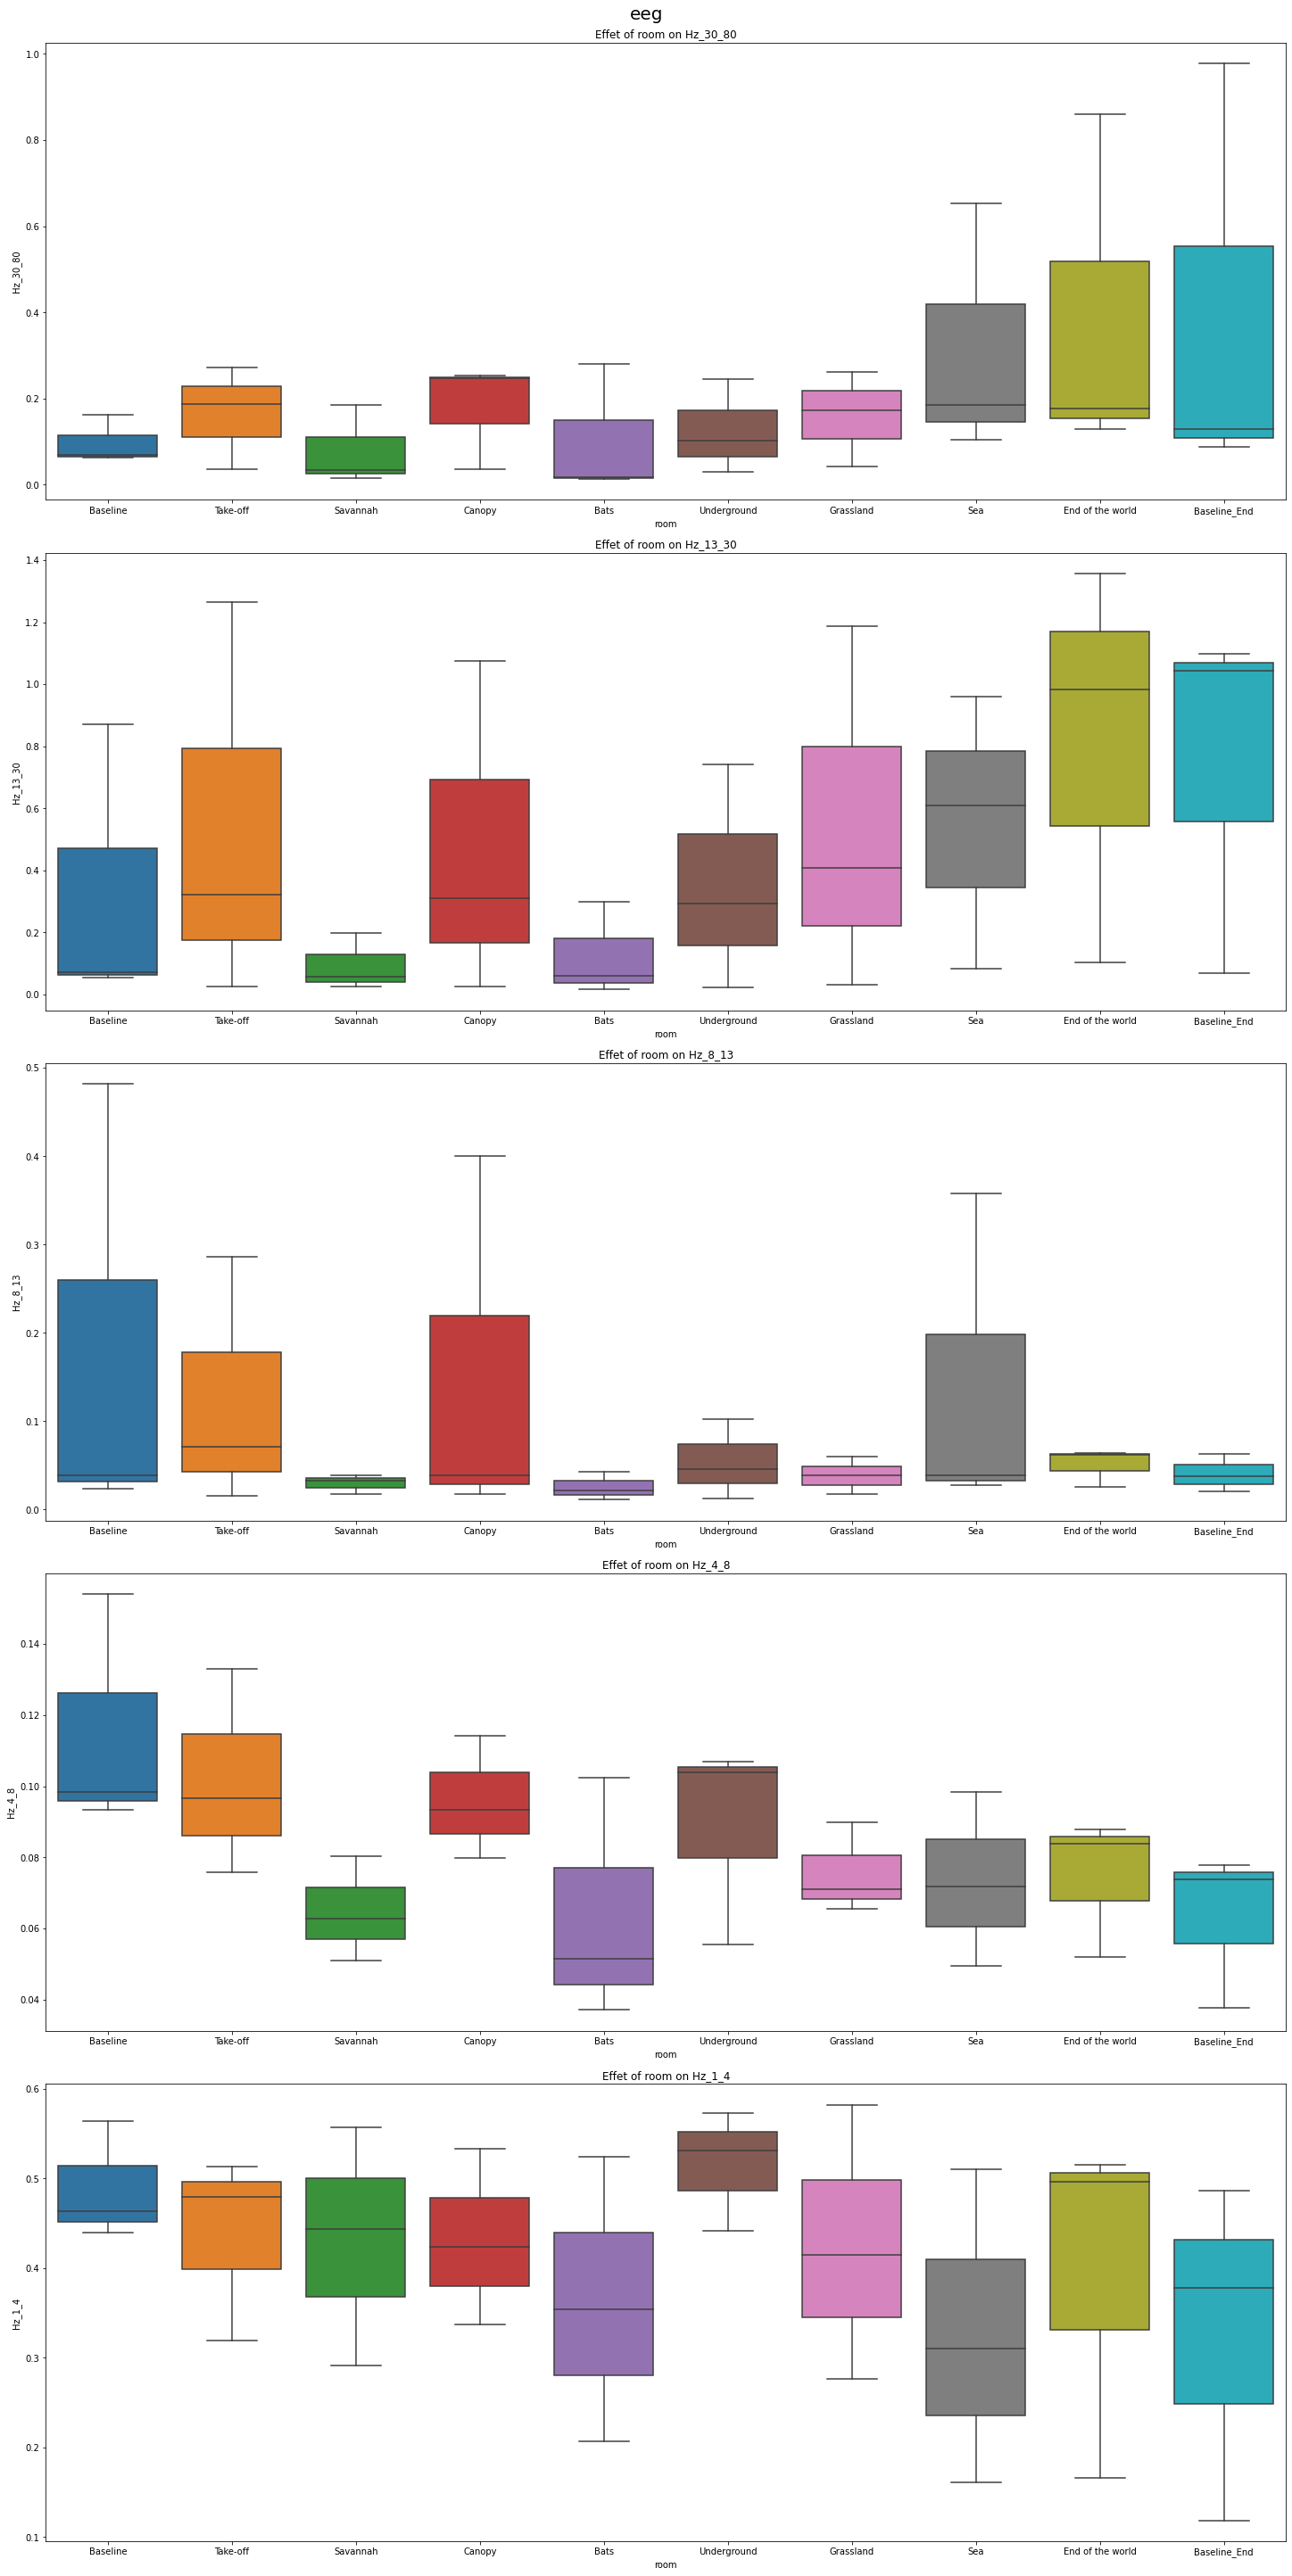

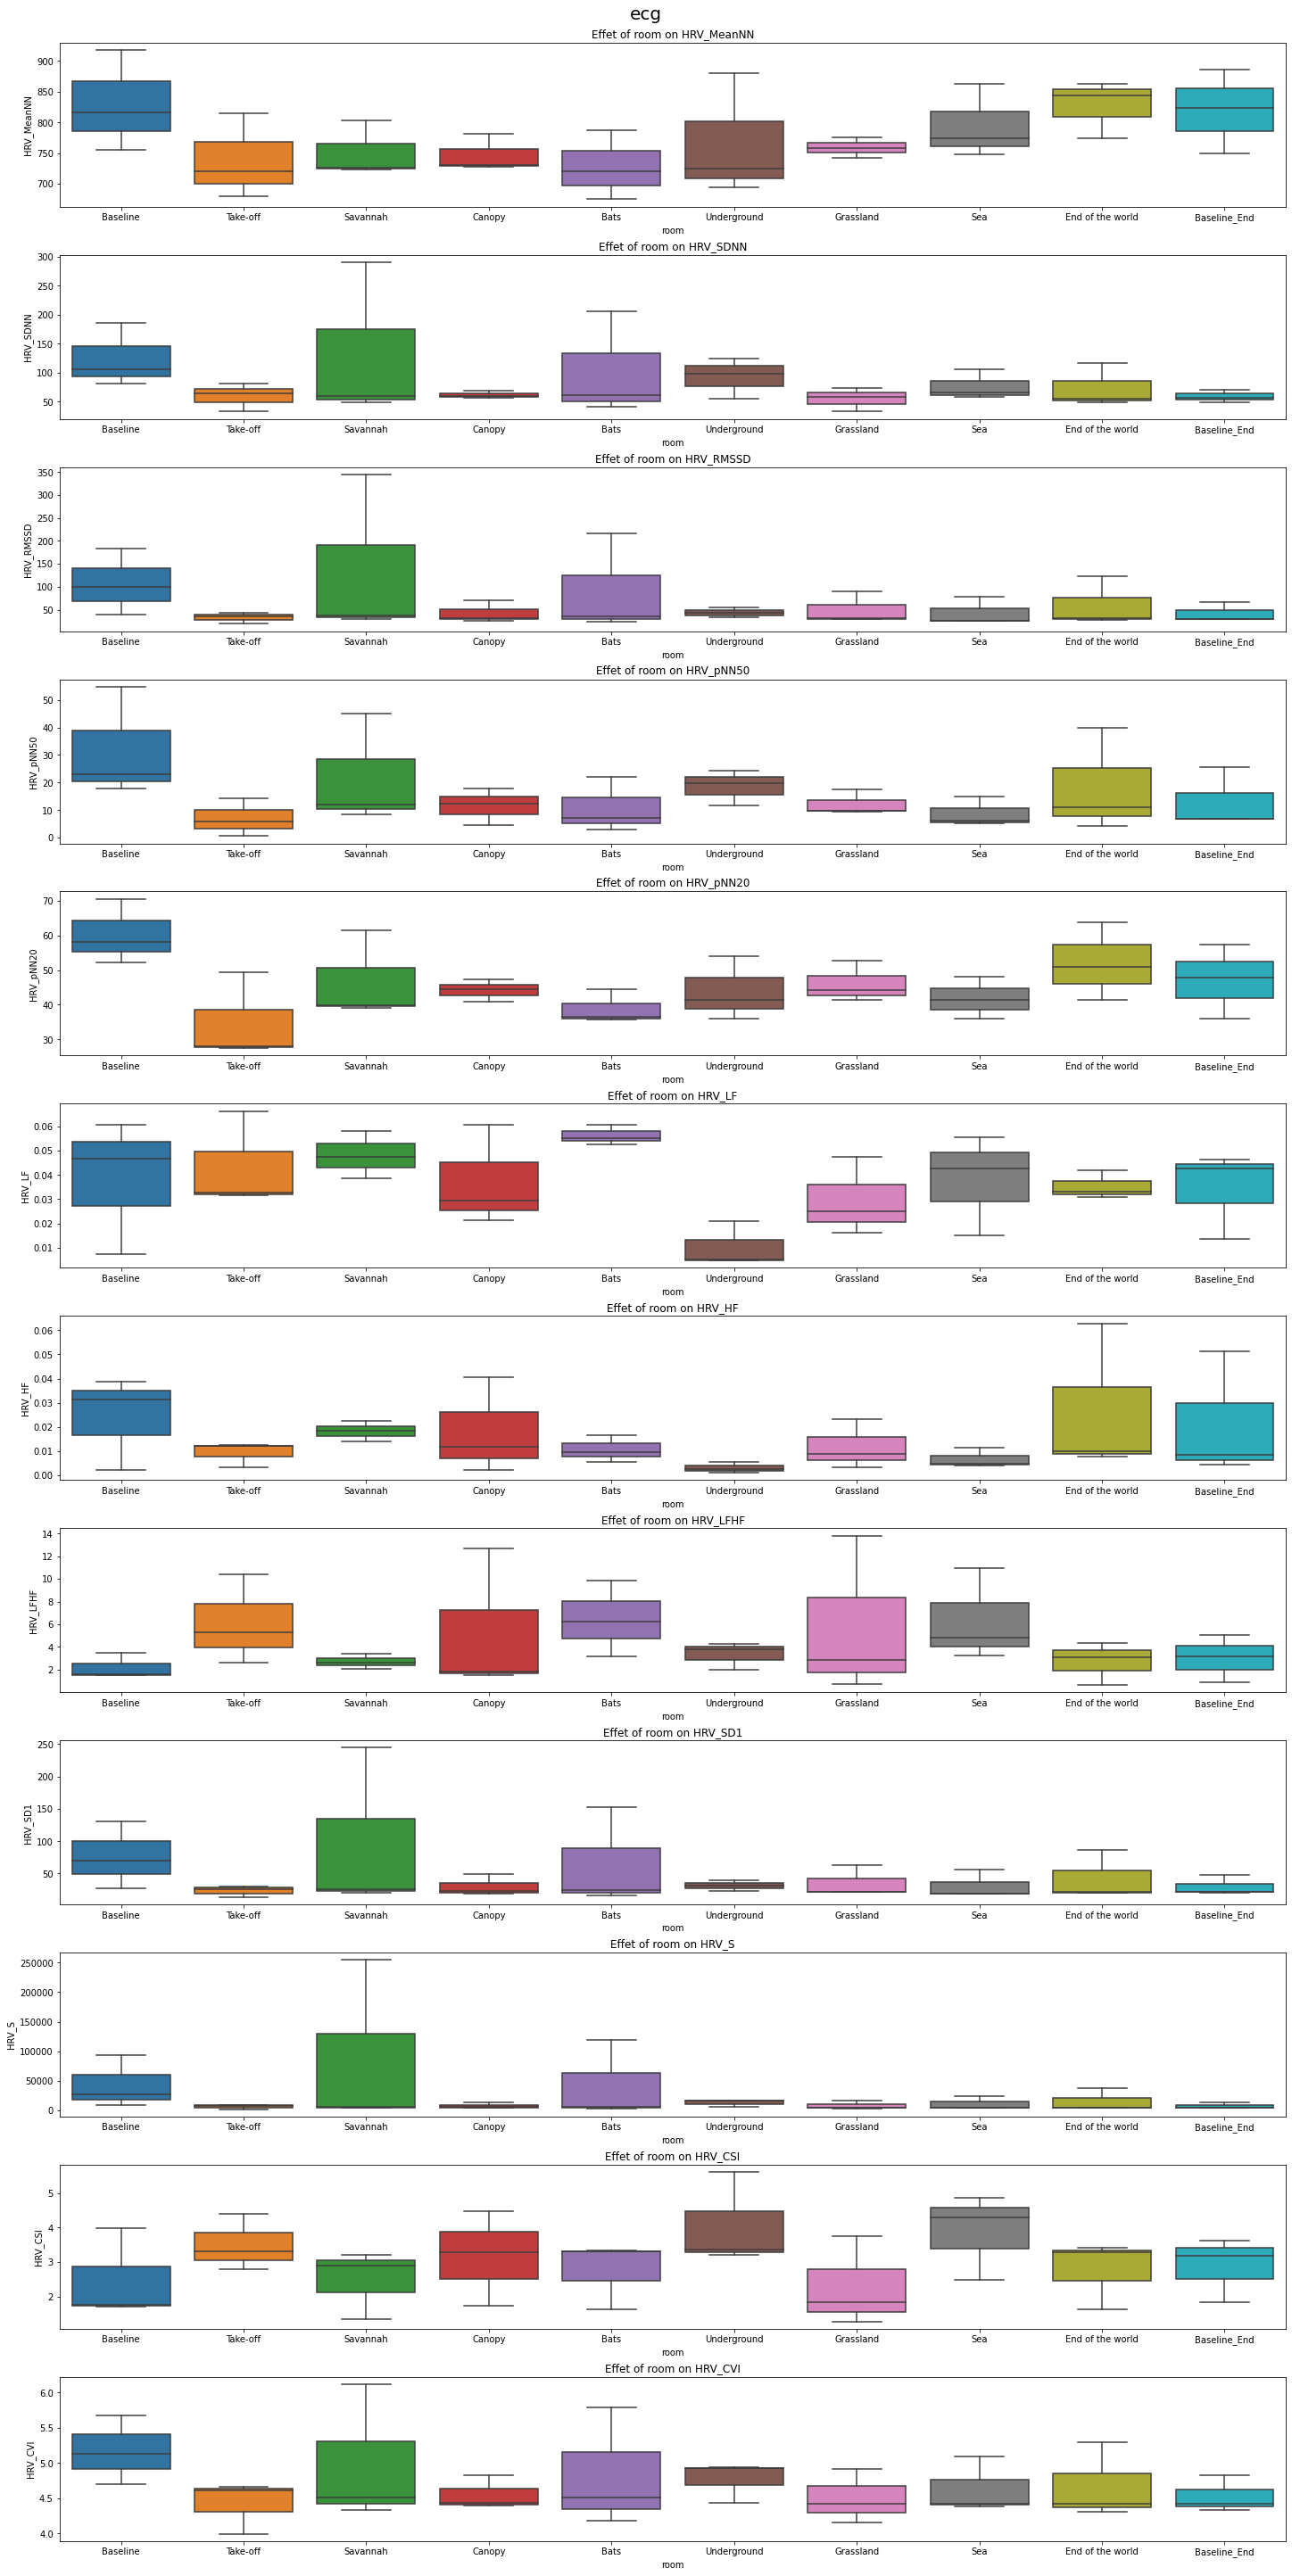

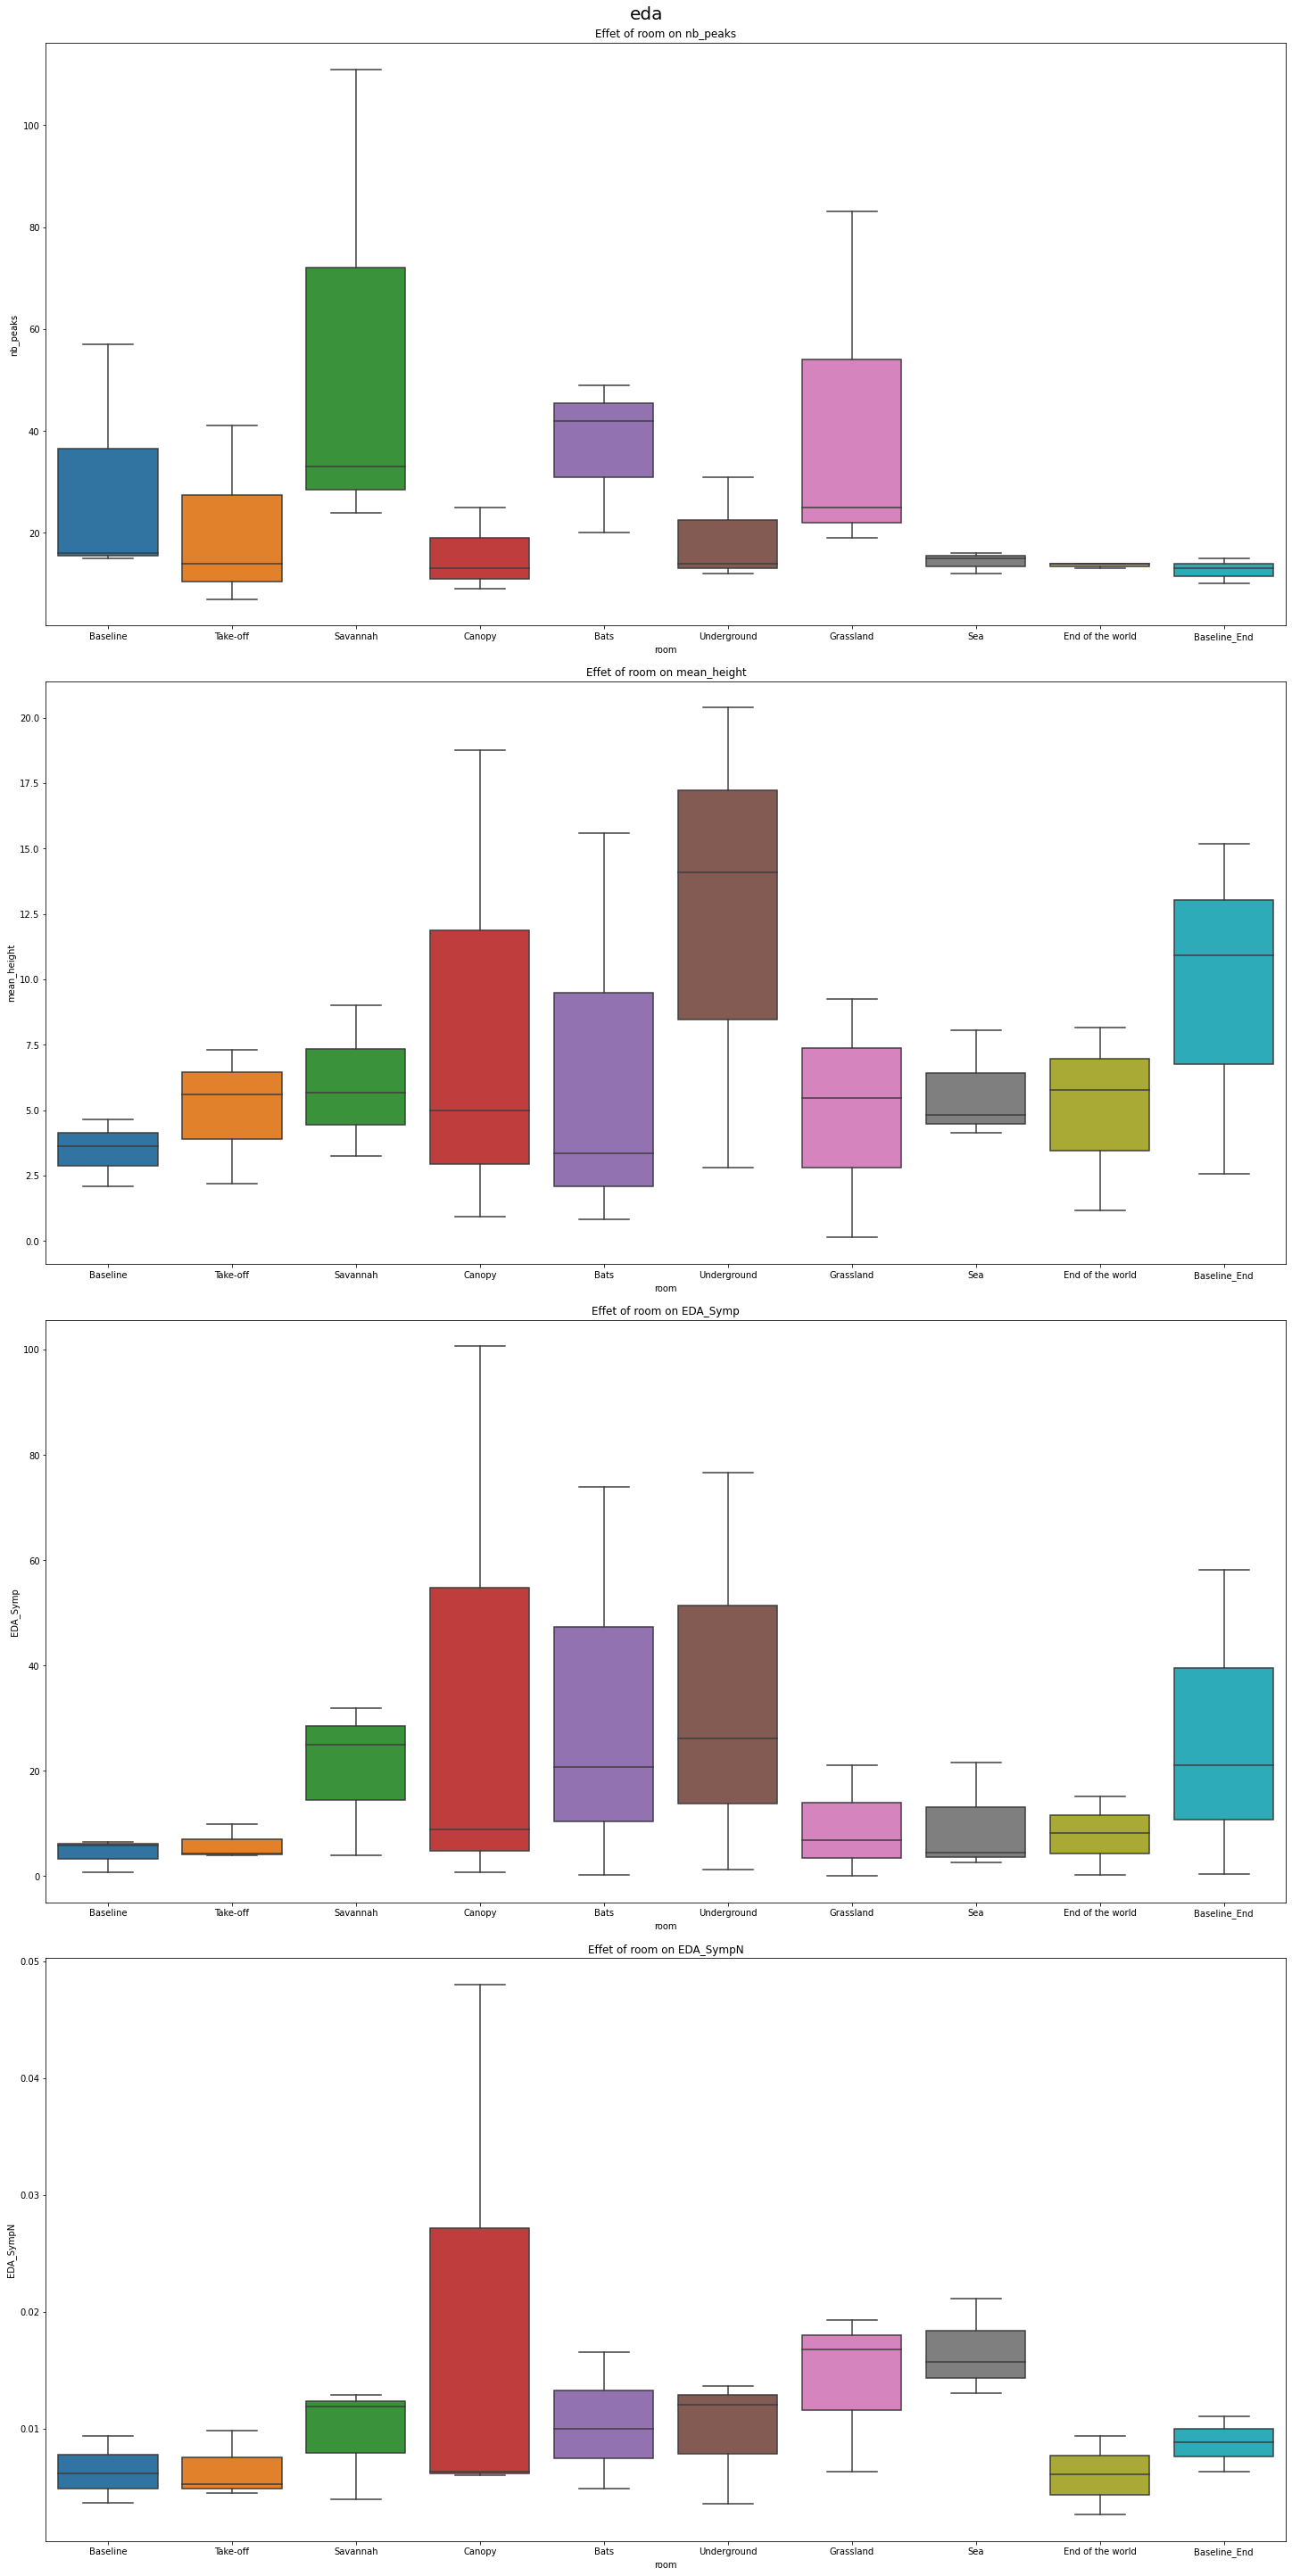

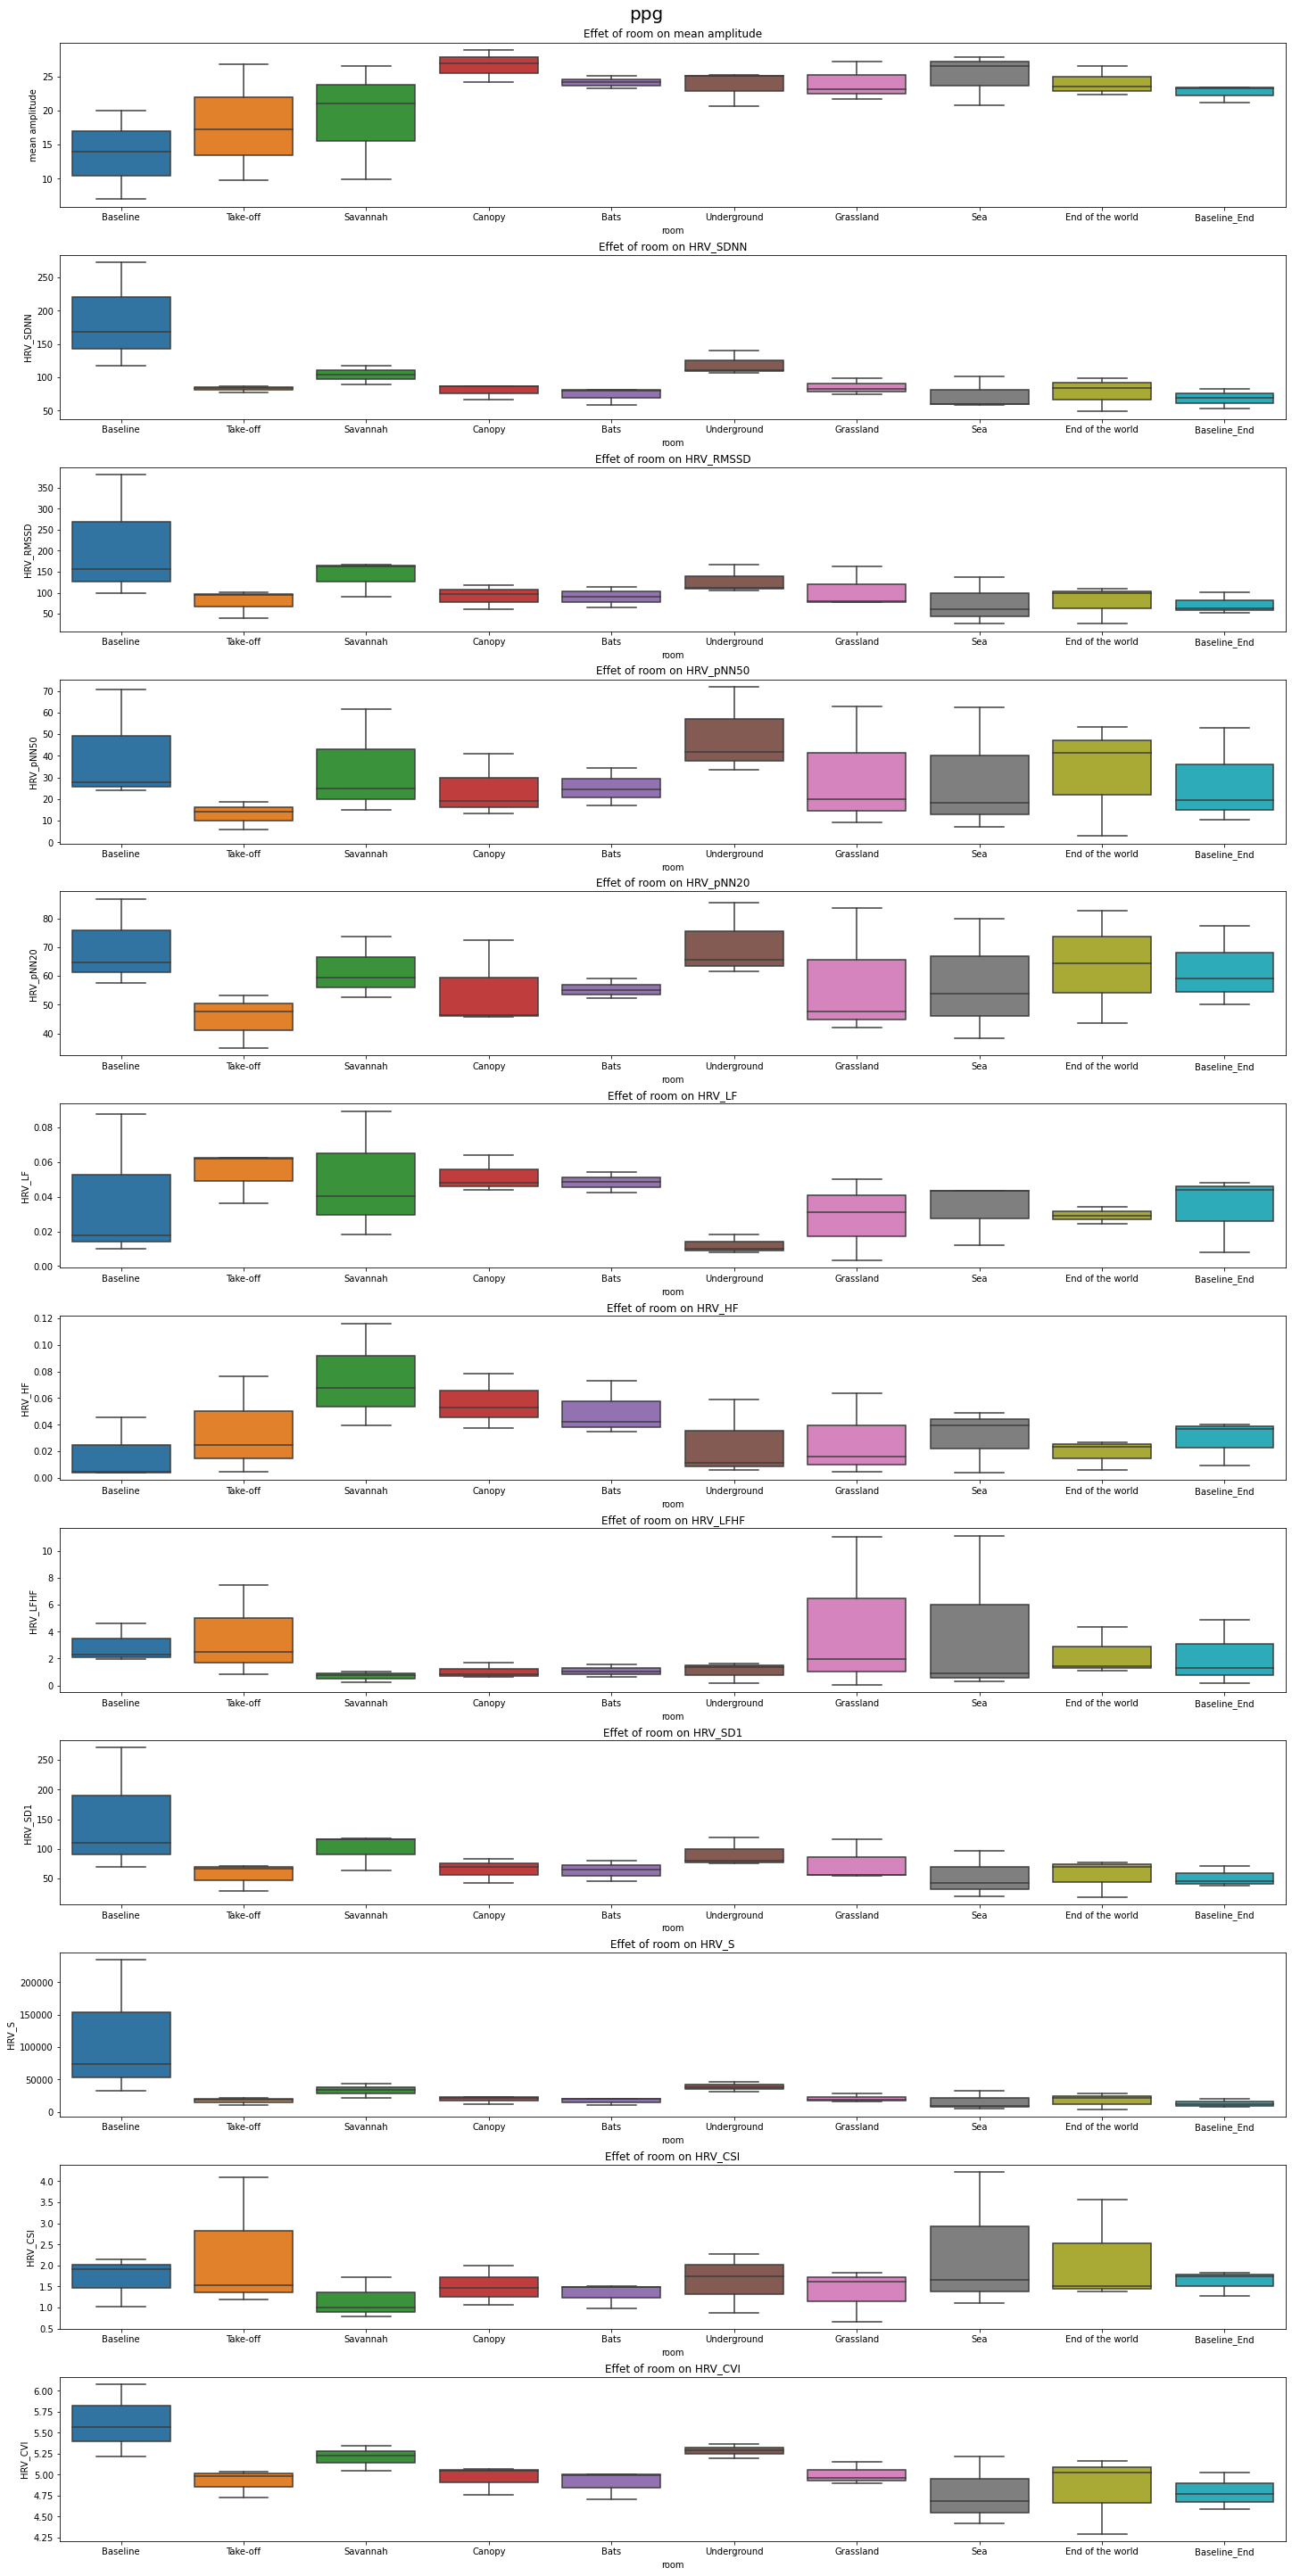

In [102]:
for dtype in dtypes:
    df = load(dtype)
    loop_outcomes = outcomes[dtype]
    fig, axs = plt.subplots(nrows = len(loop_outcomes), figsize = (20,40), constrained_layout = True)
    fig.suptitle(f'{dtype}', fontsize = 20)
    for row, outcome in enumerate(loop_outcomes):
        ax = axs[row]
        sns.boxplot(data=df , x=predictor , y = outcome, ax = ax)
        ax.set_title(f'Effet of {predictor} on {outcome}')
    if savefig:
        plt.savefig(f'../stats/figs/boxplot_{dtype}')
    plt.show()